For this excercise, i will be using an Electric Vehicle Specs Dataset from [kaggle](https://www.kaggle.com/datasets/urvishahir/electric-vehicle-specifications-dataset-2025).

In [5]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('electric_vehicles_spec_2025.csv')
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

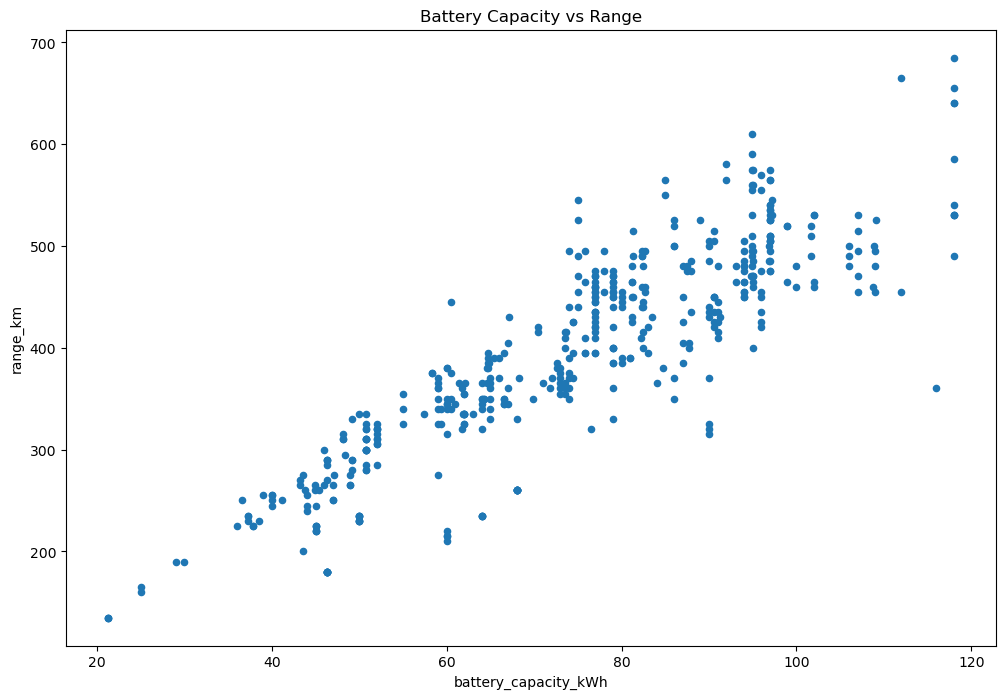

In [8]:
df.plot(kind='scatter',x='battery_capacity_kWh',y='range_km',figsize=(12,8))

plt.title('Battery Capacity vs Range')
plt.ylabel('range_km')
plt.xlabel('battery_capacity_kWh')

plt.show()

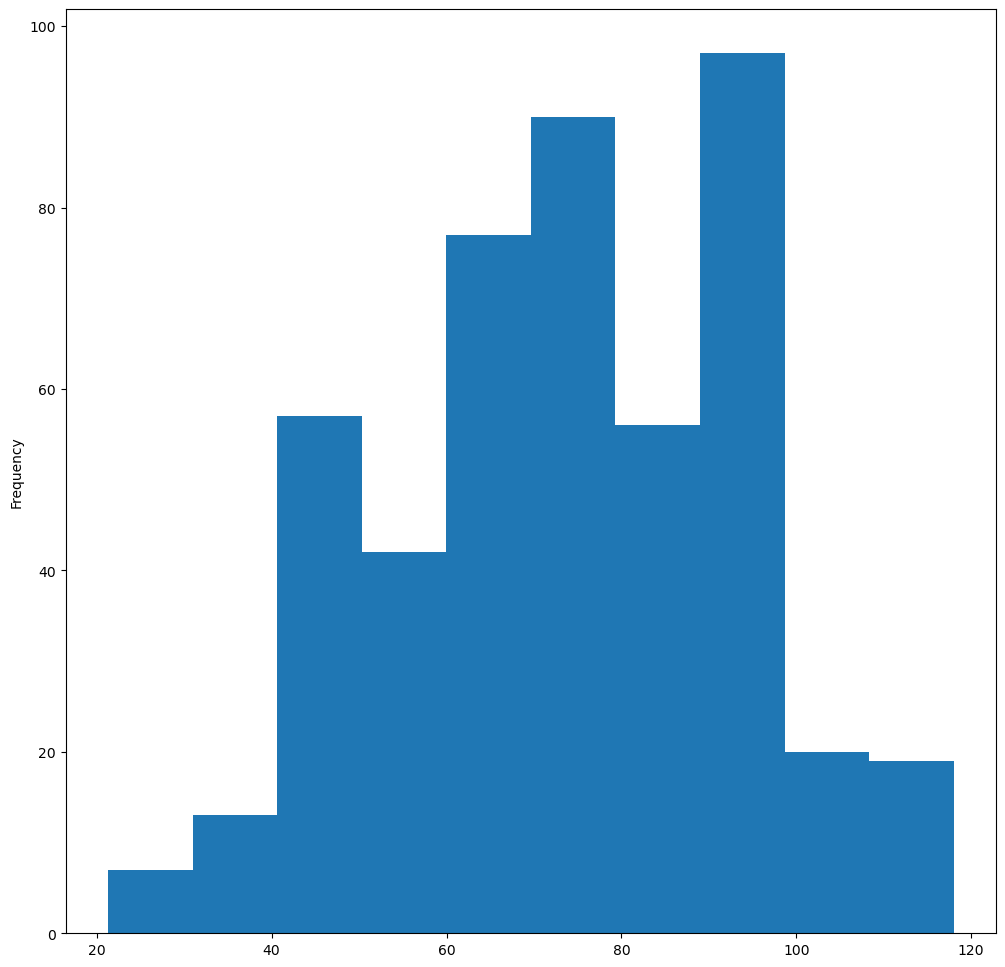

In [9]:
df['battery_capacity_kWh'].plot(kind = 'hist', bins = 10, figsize = (12,12))
plt.show()

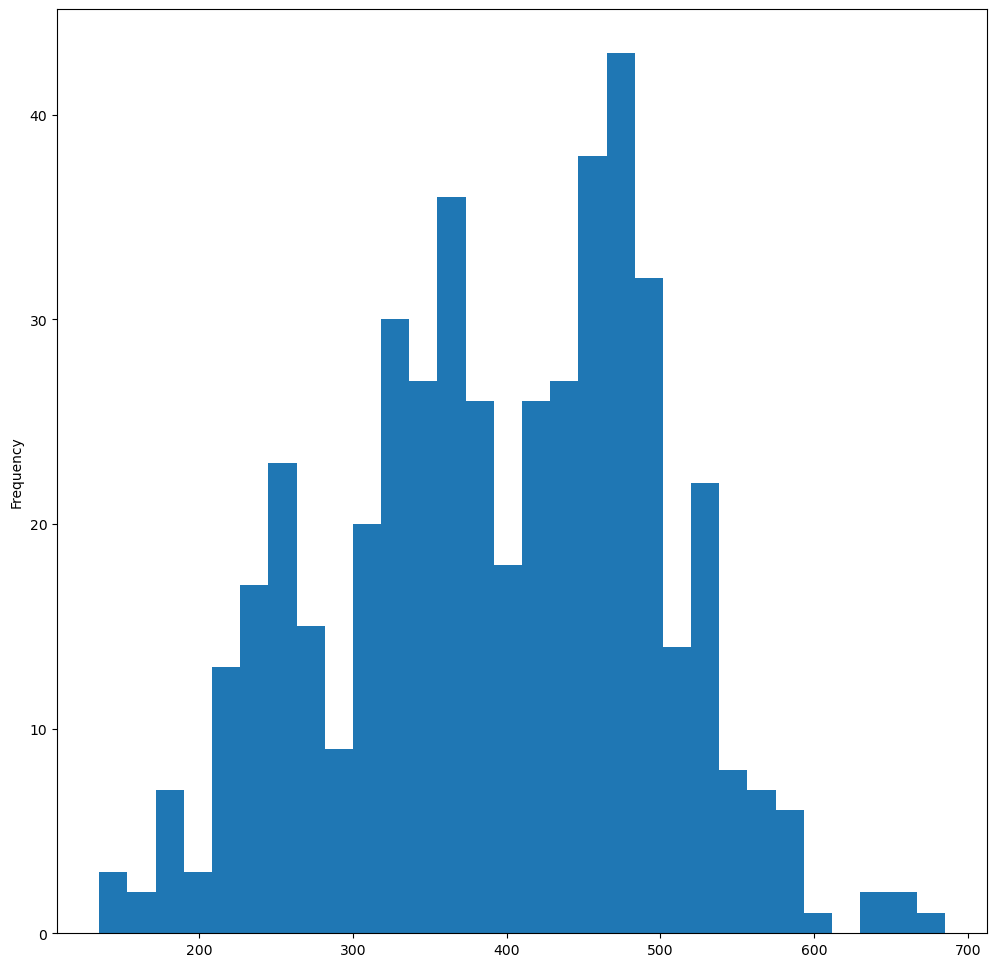

In [10]:
df['range_km'].plot(kind = 'hist', bins = 30, figsize = (12,12))
plt.show()

Let's see which EVs have the highest range.


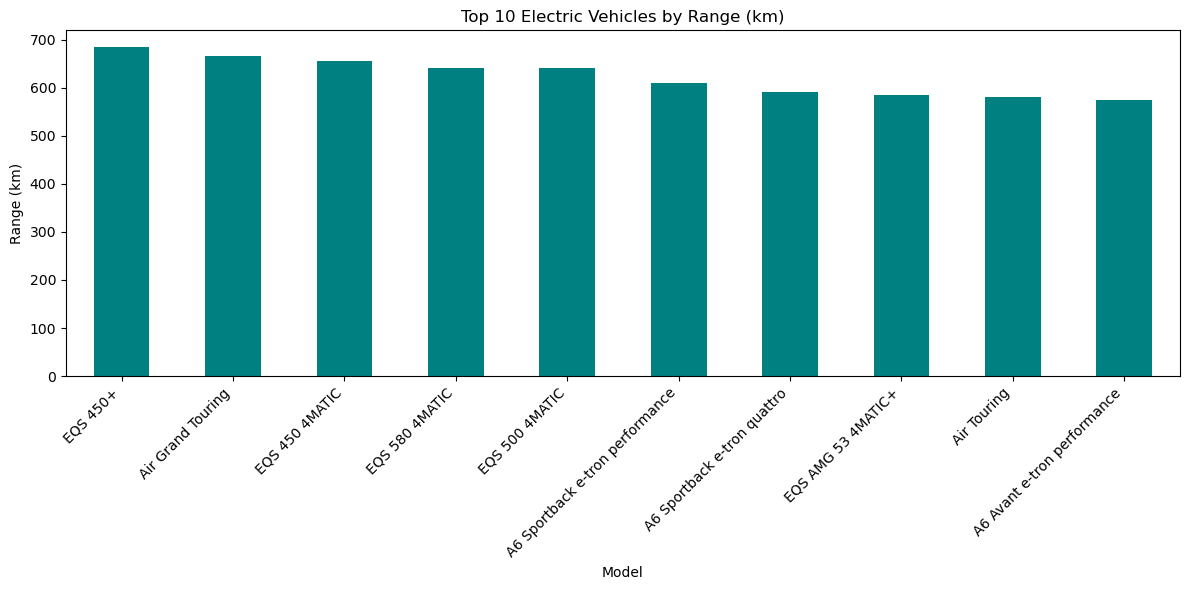

In [13]:
top10_range = df[['model', 'range_km']].sort_values('range_km', ascending=False).head(10)
top10_range.plot(kind='bar', x='model', y='range_km', legend=False, figsize=(12,6), color='teal')
plt.title('Top 10 Electric Vehicles by Range (km)')
plt.ylabel('Range (km)')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

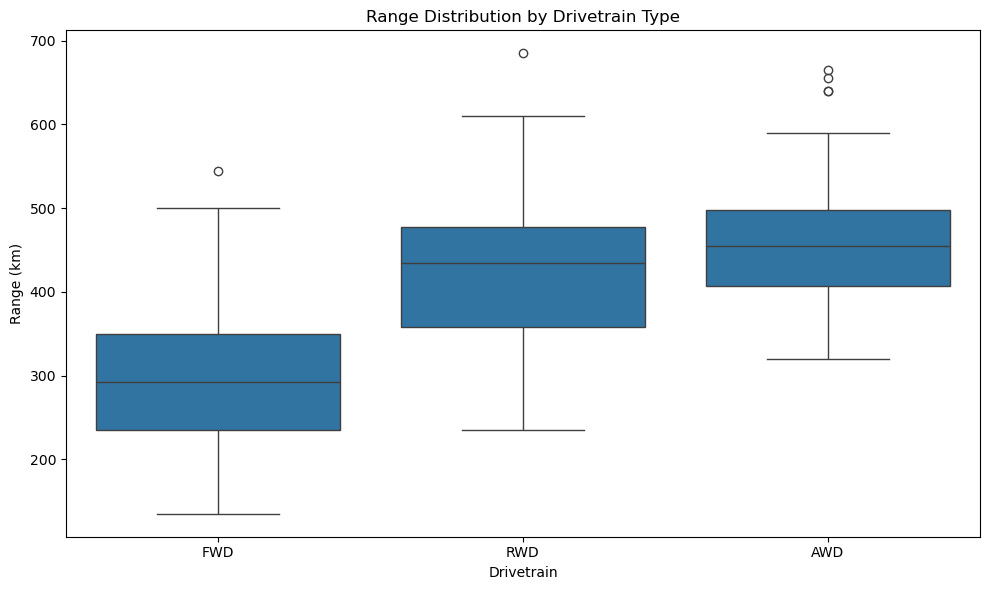

In [ ]:

    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='drivetrain', y='range_km')
    plt.title('Range Distribution by Drivetrain Type')
    plt.xlabel('Drivetrain')
    plt.ylabel('Range (km)')
    plt.tight_layout()
    plt.show()


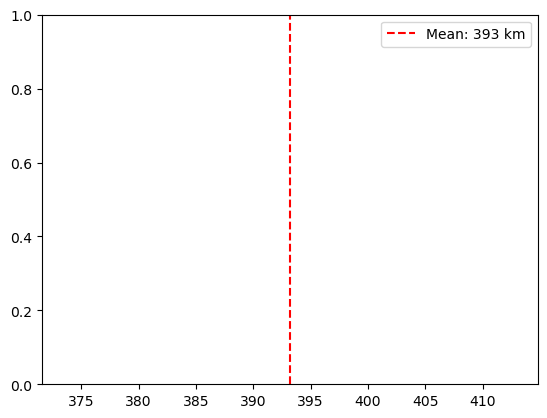

In [18]:
mean_range = df['range_km'].mean()
plt.axvline(mean_range, color='red', linestyle='--', label=f'Mean: {mean_range:.0f} km')
plt.legend()


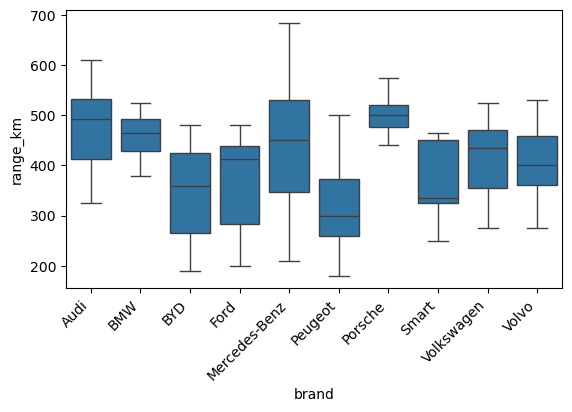

In [20]:
top_brands = df['brand'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['brand'].isin(top_brands)], x='brand', y='range_km')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)


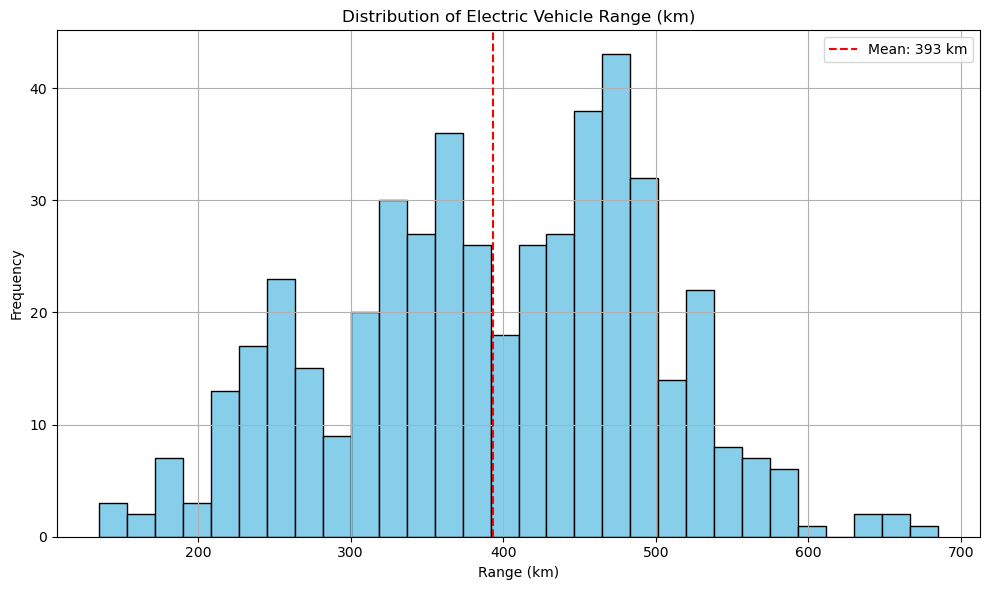

In [21]:
# 1. Histogram: Distribution of EV Range
plt.figure(figsize=(10,6))
plt.hist(df['range_km'].dropna(), bins=30, color='skyblue', edgecolor='black')
mean_range = df['range_km'].mean()
plt.axvline(mean_range, color='red', linestyle='--', label=f'Mean: {mean_range:.0f} km')
plt.title('Distribution of Electric Vehicle Range (km)')
plt.xlabel('Range (km)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


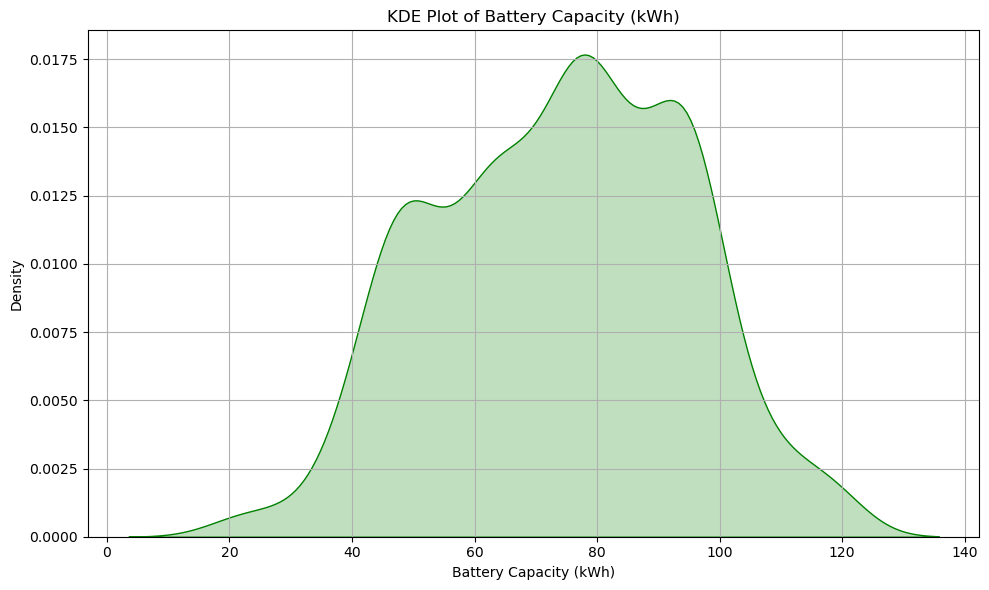

In [22]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['battery_capacity_kWh'].dropna(), fill=True, color='green')
plt.title('KDE Plot of Battery Capacity (kWh)')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

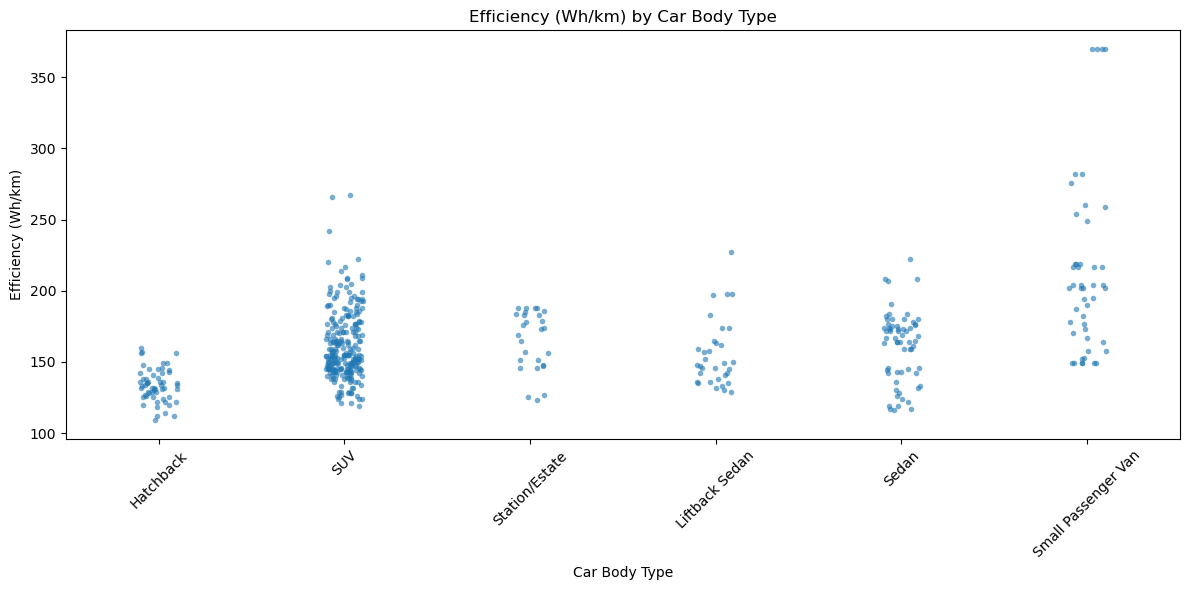

In [24]:
top_bodies = df['car_body_type'].value_counts().nlargest(6).index
plt.figure(figsize=(12,6))
sns.stripplot(data=df[df['car_body_type'].isin(top_bodies)], 
              x='car_body_type', y='efficiency_wh_per_km', 
              size=4, jitter=True, alpha=0.6)
plt.title('Efficiency (Wh/km) by Car Body Type')
plt.xlabel('Car Body Type')
plt.ylabel('Efficiency (Wh/km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

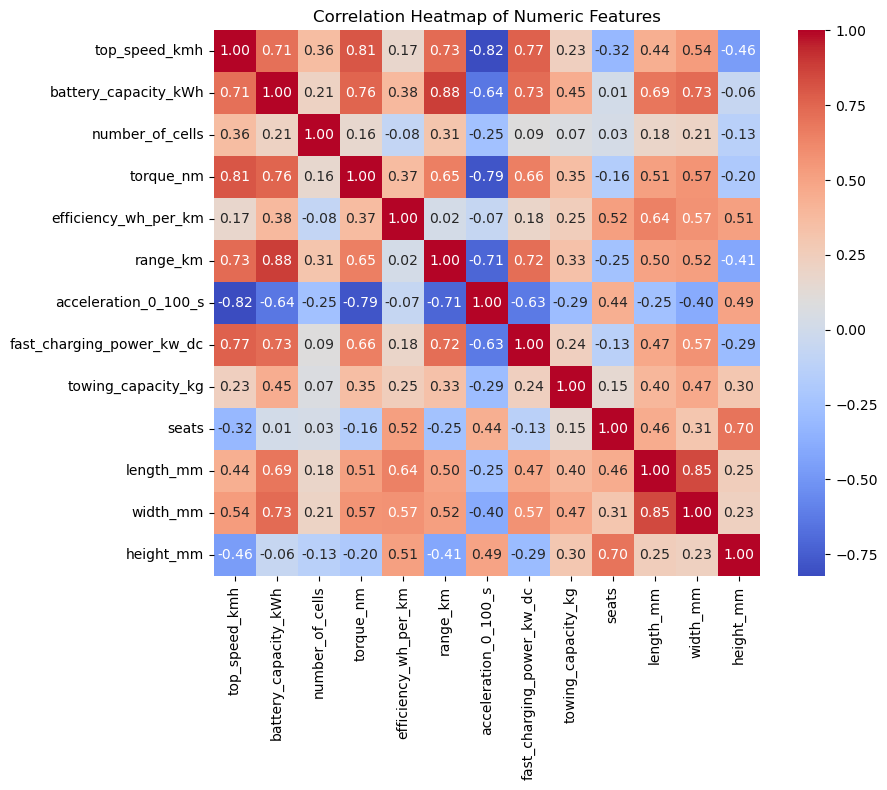

In [25]:
plt.figure(figsize=(10,8))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


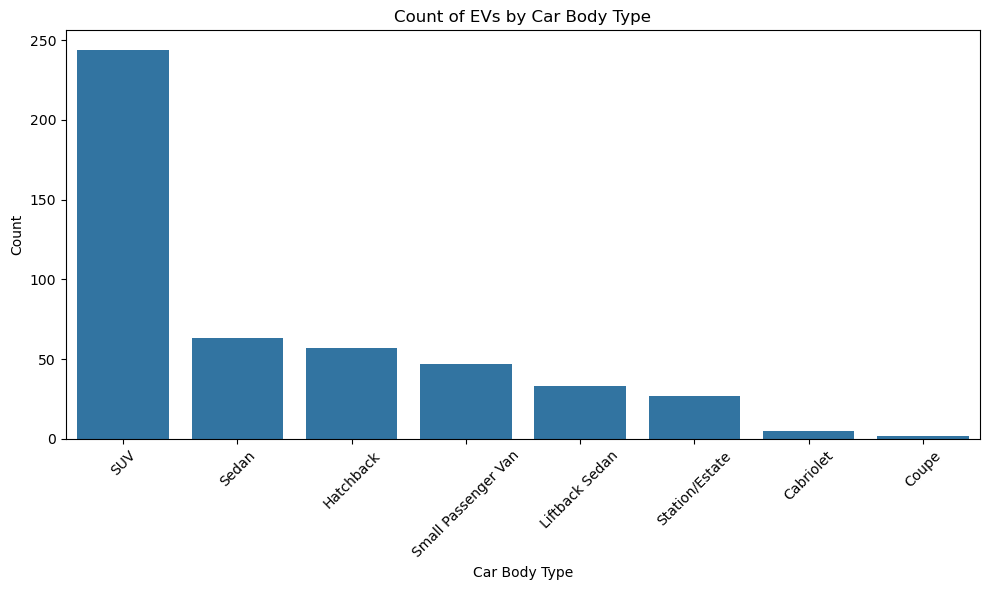

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='car_body_type', order=df['car_body_type'].value_counts().index)
plt.title('Count of EVs by Car Body Type')
plt.xlabel('Car Body Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


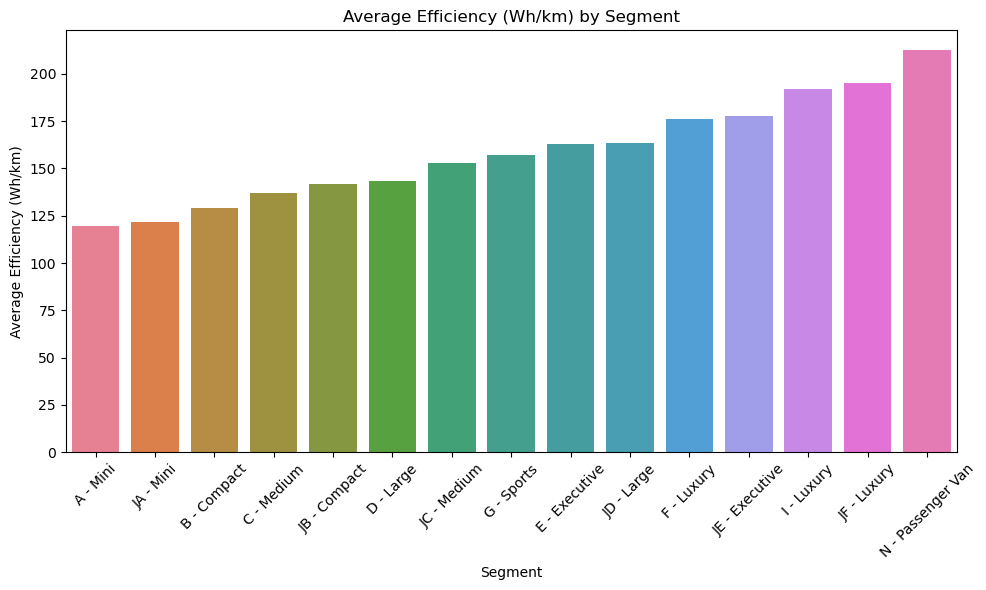

In [ ]:
plt.figure(figsize=(10,6))
avg_efficiency = df.groupby('segment')['efficiency_wh_per_km'].mean().sort_values()
sns.barplot(x=avg_efficiency.index, y=avg_efficiency.values, hue=avg_efficiency.index,legend=False)
plt.title('Average Efficiency (Wh/km) by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Efficiency (Wh/km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()